## Exploratory data analysis, classification and conclusions

In this notebook we will use already cleaned and preprocessed data to gain some insights and answer the main question of the task. The main goals of this notebook is:
* Understand relationship of some numerical features and target.
* Analyse relationship between categorical features and target.
* Perform `RandomForestClassifier` classification algorithm to analyse important features that have an impact on target variable.
* Gain some insights and make conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
warnings.filterwarnings("ignore") # warnings were turned off at the end
sns.set_style("white")
pylab.rcParams['figure.figsize'] = 10, 8

In [2]:
data = pd.read_csv("../data/clean_data.csv")
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data.head()

,target,age,internet_activity_score,employee_count,employees_count_mom_change,has_the_team_size_grown,last_funding_amount,number_of_investors_in_seed,number_of_investors_in_angel_and_or_vc,number_of_co-founders,...,b2c_or_b2b_venture?_b2b,b2c_or_b2b_venture?_b2c,highest_education_bachelors,highest_education_masters,highest_education_phd,gartner_hype_cycle_stage_peak,gartner_hype_cycle_stage_plateau,gartner_hype_cycle_stage_slope,gartner_hype_cycle_stage_trigger,gartner_hype_cycle_stage_trough
0,1,4.0,-1.0,3.0,0.0,0,450000.0,2.0,0.0,1,...,0,1,0,1,0,0,1,0,0,0
1,1,3.0,125.0,0.0,0.0,0,1000000.0,5.0,0.0,2,...,0,1,0,1,0,0,0,0,0,1
2,1,3.0,455.0,14.0,0.0,0,2350000.0,15.0,0.0,3,...,1,0,1,0,0,0,0,0,0,1
3,1,5.0,-99.0,45.0,10.0,0,10250000.0,6.0,0.0,2,...,0,1,1,0,0,0,0,0,0,1
4,1,4.0,496.0,39.0,3.0,0,5500000.0,7.0,0.0,1,...,1,0,1,0,0,0,1,0,0,0


In [3]:
data.shape

(472, 128)

In [4]:
def class_percents(df, column):
    for label in list(df[column].unique()):
        count = df[column].value_counts()[label]
        percent = str(np.round(df[column].value_counts()[label]/df.shape[0] * 100)) + " %"
        print(f"Class {label}:" , count, "|", percent)
        
class_percents(data, "target")

Class 1: 305 | 65.0 %
Class 0: 167 | 35.0 %


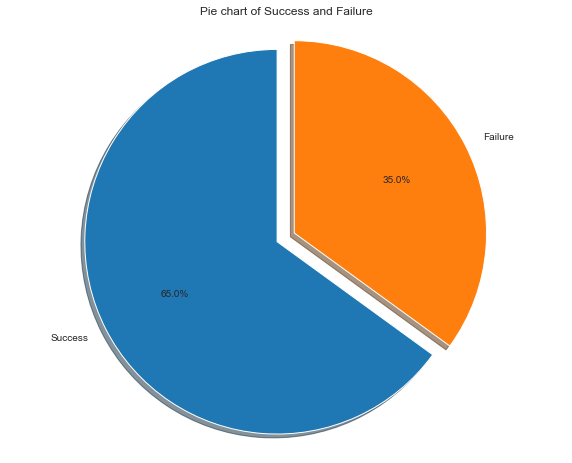

In [5]:
labels = ['Success', 'Failure']
sizes = [65, 35]
explode = (0.1, 0)  

fig, ax = plt.subplots()

ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title("Pie chart of Success and Failure")
plt.show()

Fortunately, the majority of the startups had a success in the given dataset as we can see in the above pie-chart.

Let us use the valuable information from `data_cleaning.ipynb` file that will help us to identify categorical and numerical features. First of all, lets focus on the relationship between numerical features that impact the success or failure of the startup.

In [6]:
num_data_cols = ['target', 'age', 'internet_activity_score', 'employee_count',
       'employees_count_mom_change', 'last_funding_amount',
       'number_of_investors_in_seed', 'number_of_investors_in_angel_and_or_vc',
       'number_of_co-founders', 'number_of_of_advisors',
       'team_size_senior_leadership', 'team_size_all_employees',
       'number_of_of_repeat_investors', 'years_of_education',
       'renowned_in_professional_circle',
       'experience_in_fortune_100_organizations',
       'experience_in_fortune_500_organizations', 'founders_recognitions',
       'skills_score', 'google_page_rank_of_company_website',
       'industry_trend_in_investing', 'number_of_direct_competitors',
       'avg_inv', 'percent_skill_entrepreneurship', 'percent_skill_operations',
       'percent_skill_engineering', 'percent_skill_marketing',
       'percent_skill_leadership', 'percent_skill_data_science',
       'percent_skill_business_strategy', 'percent_skill_product_management',
       'percent_skill_sales', 'percent_skill_domain', 'percent_skill_law',
       'percent_skill_consulting', 'percent_skill_finance',
       'percent_skill_investment', 'renown_score']

num_data = data[num_data_cols]
cat_data = data.drop(num_data_cols[1:], axis = 1)

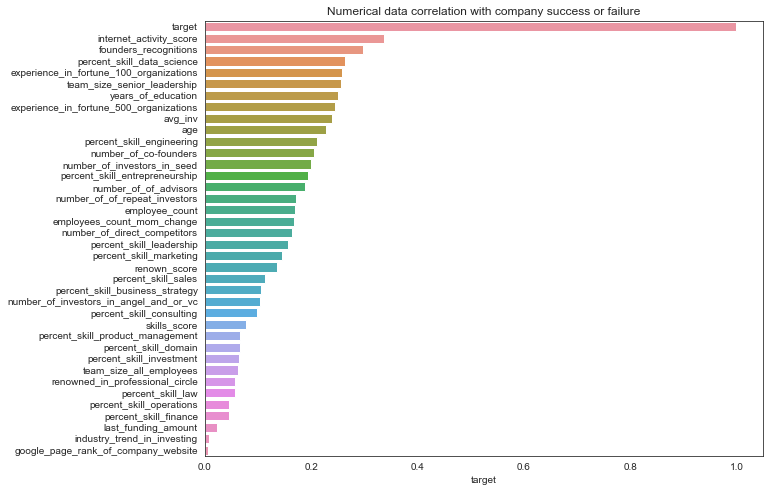

In [7]:
num_corr = num_data.corr()
num_with_target = pd.DataFrame(num_corr["target"].abs().sort_values(ascending = False))

plt.title("Numerical data correlation with company success or failure")
sns.barplot(y = num_with_target.index, x = "target", data = num_with_target);

Above we can see the most correlated numerical features with the target variable. We will try to make some conclusions about the impact of top-5 correlated features:
* Internet activity may impact the outcome of newbie companies. Using online platforms to advertise and sell products is important step to gain success.
* Number of Recognitions for Founders and Co-founders may also play an important role while starting a business, since the popularity and connections may help to improve the chance of success.
* The hype of the data science and the complex problems that this industry can solve for business may be the main factor of success, since data-driven solutions is very important for other industries as well.
* Experience in top companies of the Founders and Co-founders may increase chance of success, since it helped to gain huge knowledge and make important connections.
* Team size with the leadership of senior is essential for the success as well. Seniors can have a huge impact on the quality of the work and help newbie employees to improve as a professional.

Lets plot some the most correlated discrete numerical features that may impact the future of the startups.

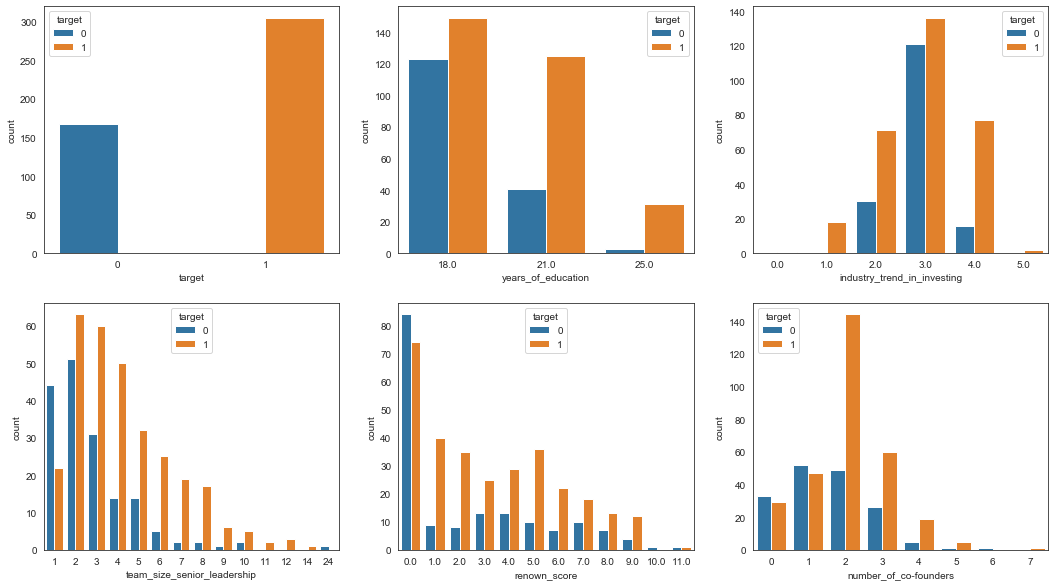

In [8]:
discrete_feats = ["target", "years_of_education", 
                  "industry_trend_in_investing", 
                  "team_size_senior_leadership",
                  "renown_score",
                  "number_of_co-founders"]

fig, ax = plt.subplots(round(len(discrete_feats) / 3), 3, figsize = (18, 10))

for i, ax in enumerate(fig.axes):
    if i < len(discrete_feats):
        sns.countplot(x = discrete_feats[i] ,hue = "target", data = num_data[discrete_feats], ax = ax)

Here we can make some conclusions with the help of discrete features:

* We can clearly see that years of education of founders is important. The more years of education of founders results of less chances to fail.
* Increase of industry trend in investing may also lower chances of failure.
* Smaller teams with senior leadership may increase chances of success.
* Most of the startups with 2 Co-founders have succeeded.

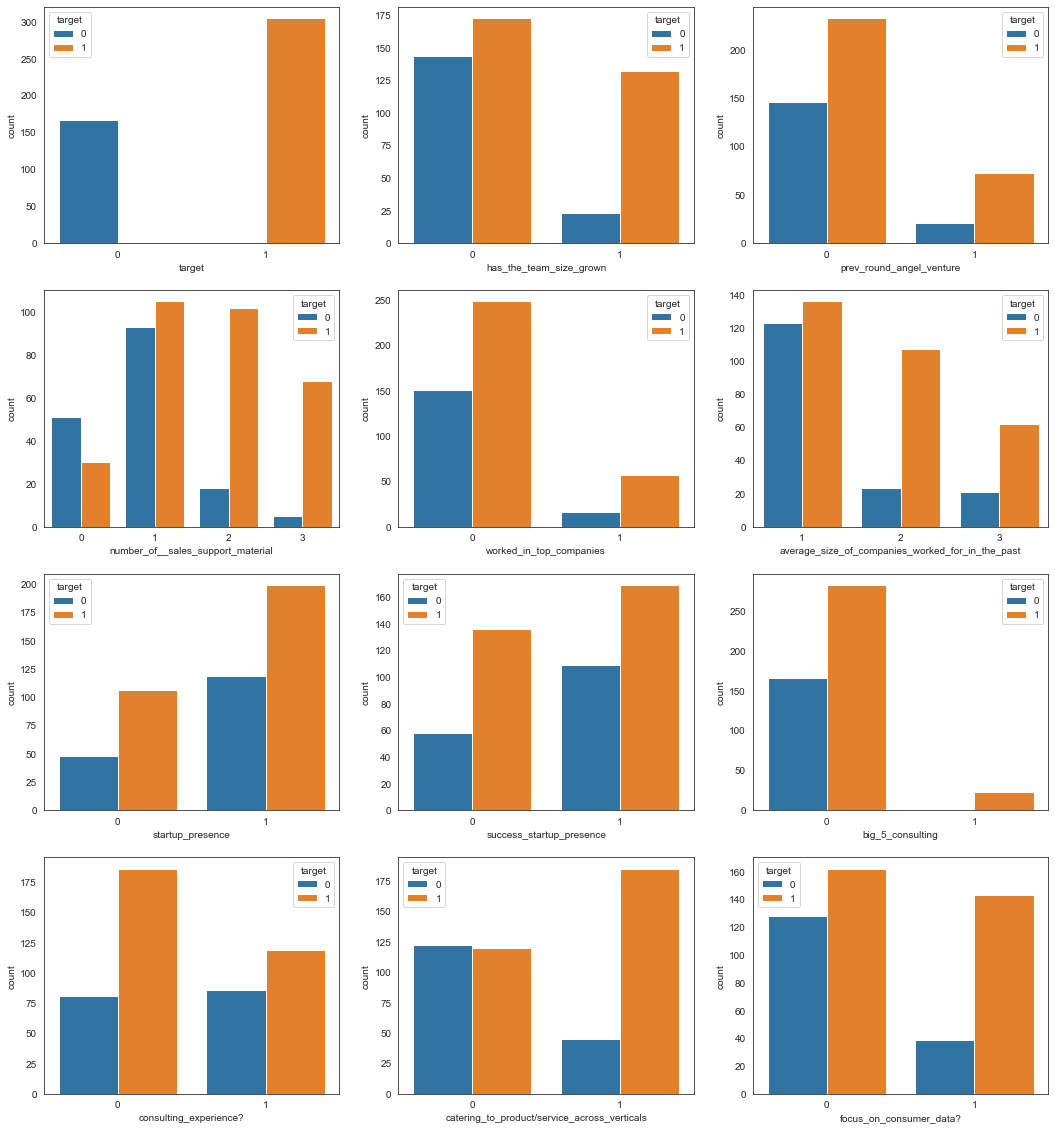

In [9]:
first_15_cat = cat_data.columns[0:12]

fig, ax = plt.subplots(round(len(first_15_cat) / 3), 3, figsize = (18, 20))

for i, ax in enumerate(fig.axes):
    if i < len(first_15_cat):
        sns.countplot(x = first_15_cat[i] ,hue = "target", data = cat_data[first_15_cat], ax = ax)

Let us gain some insights from some of the categorical features:
* Growing the team size may decrease chances of failure.
* Most of the succeeded startups have high number of sales of support material.
* Size of the companies that founders worked is essential as well.
* Winston Churchil once said: `Success is not final, failure is not fatal: it is the courage to continue that counts.` With that being said, founders who have failed startups in the past have higher chances to succeed.

Now lets use classification algorithm to see the performance and analyse feature importances that the algorithm provides.

In [10]:
X = data.drop("target", axis = 1)
y = data["target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

Lets tune the number of estimators.

In [12]:
model = RandomForestClassifier(random_state = 33)

params = {
    "n_estimators": [100, 200, 300, 400, 500],
}

model_cv = GridSearchCV(model, param_grid = params, scoring = "accuracy", cv = 5)
model_fit = model_cv.fit(X_train, y_train)

print("Best score:", model_cv.best_score_)
print("Best parameter:", model_cv.best_params_)

Best score: 0.9044912280701753
Best parameter: {'n_estimators': 300}


In [13]:
estimators = model_cv.best_params_["n_estimators"]

optimal_model = RandomForestClassifier(random_state = 33, n_estimators = estimators)
optimal_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=33, verbose=0,
                       warm_start=False)

Just out of the curiosity, lets see how the model performs on the test data.

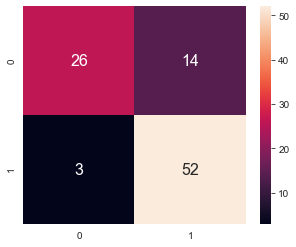

In [14]:
y_pred = optimal_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 16}, fmt = "g")
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75        40
           1       0.79      0.95      0.86        55

    accuracy                           0.82        95
   macro avg       0.84      0.80      0.81        95
weighted avg       0.83      0.82      0.81        95



We have a slight class-imbalance problem, since f1-score of class 0 is less compared with the class 1. However, we were able to correctly classify 82% of the labels on the test data.

Now lets focus more on the feature importances and make conclusions.

In [16]:
feat_importances = pd.Series(optimal_model.feature_importances_, index = X_train.columns)
sorted_feats = feat_importances.sort_values(ascending = False)
sorted_feats = pd.DataFrame(sorted_feats, columns = ["importance"])
sorted_feats.head()

,importance
internet_activity_score,0.076384
avg_inv,0.064708
google_page_rank_of_company_website,0.057148
founders_recognitions,0.051153
employee_count,0.042001


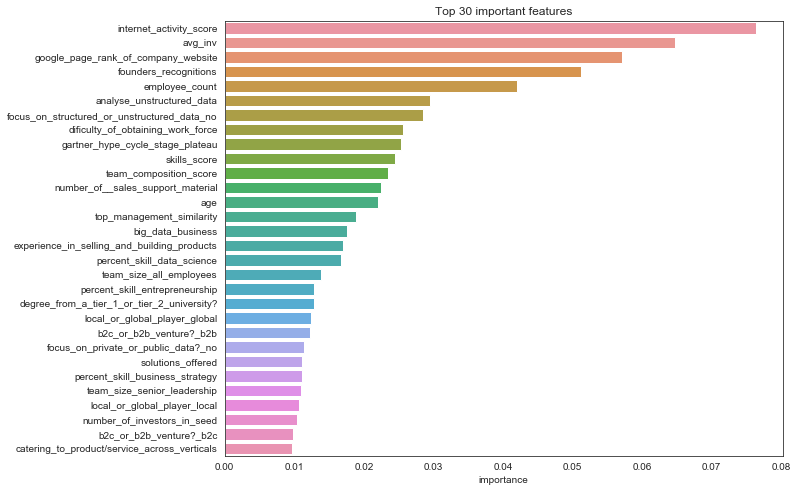

In [17]:
plt.title("Top 30 important features")
sns.barplot(x = "importance", y = sorted_feats[:30].index, data = sorted_feats[:30]);

Above we can see the bar chart of important features. Lets gain some insights:
* Model tells us that activity on social media is essential, which we already saw above.
* Companies with more frequent investments have higher chances to succeed.
* Google page rank of the companies website may indicate that users are more interested to the services of the company, which will positively impact on the companies success.
* Founders recognitions is also essential, which we already observed above.
* Employee count may also increase the success rate.

Lets plot some of the important variables.

In [18]:
def hist_labeled(data, column, target):
    df = data[data[target] == 0]
    sns.distplot(df[column],  kde=False, label='Failure')
    df = data[data[target] == 1]
    sns.distplot(df[column],  kde=False, label='Success')
    plt.legend()
    plt.show()

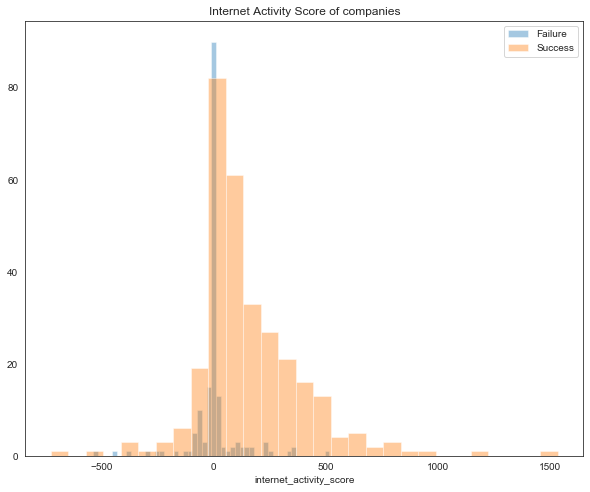

In [19]:
plt.title("Internet Activity Score of companies")
hist_labeled(data, "internet_activity_score", "target")

We can clearly see that companies with more internet activity succeed.

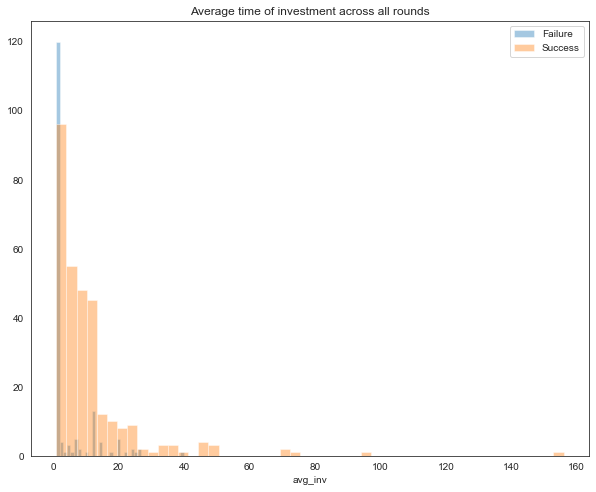

In [20]:
plt.title("Average time of investment across all rounds")
hist_labeled(data, "avg_inv", "target")

Companies with high average investment rate have lower chances to fail.

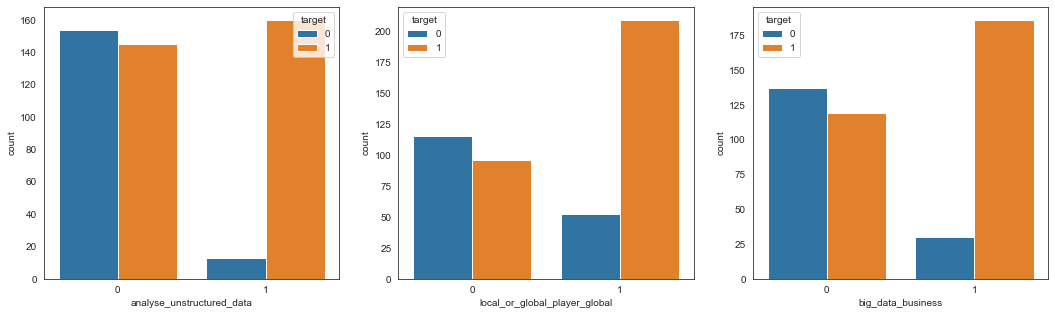

In [21]:
some_most_importants = ['analyse_unstructured_data',
                        'local_or_global_player_global', 
                        'big_data_business', 'degree_from_a_tier_1_or_tier_2_university?']

fig, ax = plt.subplots(round(len(some_most_importants) / 3), 3, figsize = (18, 5))

for i, ax in enumerate(fig.axes):
    if i < len(some_most_importants):
        sns.countplot(x = some_most_importants[i] ,hue = "target", data = data, ax = ax)

Above we can see some of the important categorical variables. This information can help us understand that:
* Companies that are analysing unstructured data may have higher chances to succeed.
* Companies that are global players may have higher chances to succeed.
* Big data analysis became most essential part of majority of industries, which indicates that startups that are connected with big data have higher chances to succeed.

To sum up, it is essential to understand why startups fail or succeed, if you want to have your own startup some day. I assume that above conclusions will be very helpful to gain some insights.